<a href="https://colab.research.google.com/github/SAIKARTHIGEYAN1512/review2/blob/main/efficientnet_b7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
IMG_SIZE = 224
TRAINING_DIR = "/content/chest_xray/chest_xray/train"
training_datagen = ImageDataGenerator(rescale = 1./255 ,
                                      shear_range=0.2,
                                      zoom_range=0.2)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size=(IMG_SIZE,IMG_SIZE) ,class_mode='categorical',
                                                       batch_size=64,shuffle=True )


TEST_DIR = "/content/chest_xray/chest_xray/test"
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=(IMG_SIZE,IMG_SIZE), class_mode = None , batch_size = 64,
                                                  shuffle = False)


VAL_DIR = "/content/chest_xray/chest_xray/val"
val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_directory(TEST_DIR,target_size=(IMG_SIZE,IMG_SIZE),class_mode='categorical',
                                                       batch_size=64,shuffle= False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


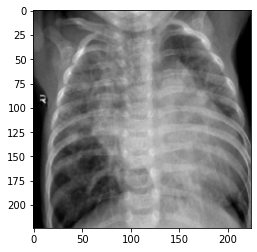

In [ ]:
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [ ]:
import tensorflow_hub as hub

URL='https://tfhub.dev/google/efficientnet/b7/classification/1' 
feature_extractor = hub.KerasLayer(URL, input_shape=(600,600,3))
feature_extractor.trainable = False

In [ ]:
model = tf.keras.models.Sequential([    
    feature_extractor,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='softmax')
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1000)              66658680  
_________________________________________________________________
dense (Dense)                (None, 64)                64064     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 66,727,034
Trainable params: 68,354
Non-trainable params: 66,658,680
_______________________________________

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs['accuracy']>=0.95):
      self.model.stop_training=True

callbacks=myCallback()
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')]
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=METRICS )

history = model.fit(train_generator , epochs=5 , callbacks=[callbacks], validation_data=val_generator)

Epoch 1/5
82/82 [==============================] - 2324s 28s/step - loss: 0.4419 - accuracy: 0.7912 - precision: 0.7912 - recall: 0.7912 - val_loss: 0.4747 - val_accuracy: 0.7853 - val_precision: 0.7853 - val_recall: 0.7853
Epoch 2/5
82/82 [==============================] - 2301s 28s/step - loss: 0.2514 - accuracy: 0.8947 - precision: 0.8947 - recall: 0.8947 - val_loss: 0.3886 - val_accuracy: 0.8157 - val_precision: 0.8157 - val_recall: 0.8157
Epoch 3/5
82/82 [==============================] - 2320s 28s/step - loss: 0.2090 - accuracy: 0.9176 - precision: 0.9176 - recall: 0.9176 - val_loss: 0.3536 - val_accuracy: 0.8413 - val_precision: 0.8413 - val_recall: 0.8413
Epoch 4/5
82/82 [==============================] - 2288s 28s/step - loss: 0.1917 - accuracy: 0.9248 - precision: 0.9248 - recall: 0.9248 - val_loss: 0.3519 - val_accuracy: 0.8429 - val_precision: 0.8429 - val_recall: 0.8429
Epoch 5/5
82/82 [==============================] - 2269s 28s/step - loss: 0.1776 - accuracy: 0.9331 - pr